In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('data/mnist_train.csv')
data = df.iloc[:, 1:].values.astype(np.float32)
target = df['label'].values

In [10]:
data_s = StandardScaler().fit_transform(data)
data_n = Normalizer().fit_transform(data_s)

In [11]:
embedding = PCA(n_components = 2).fit_transform(data_n)

In [12]:
reducted = pd.DataFrame(embedding, columns=('x', 'y'))
reducted["class"] = target

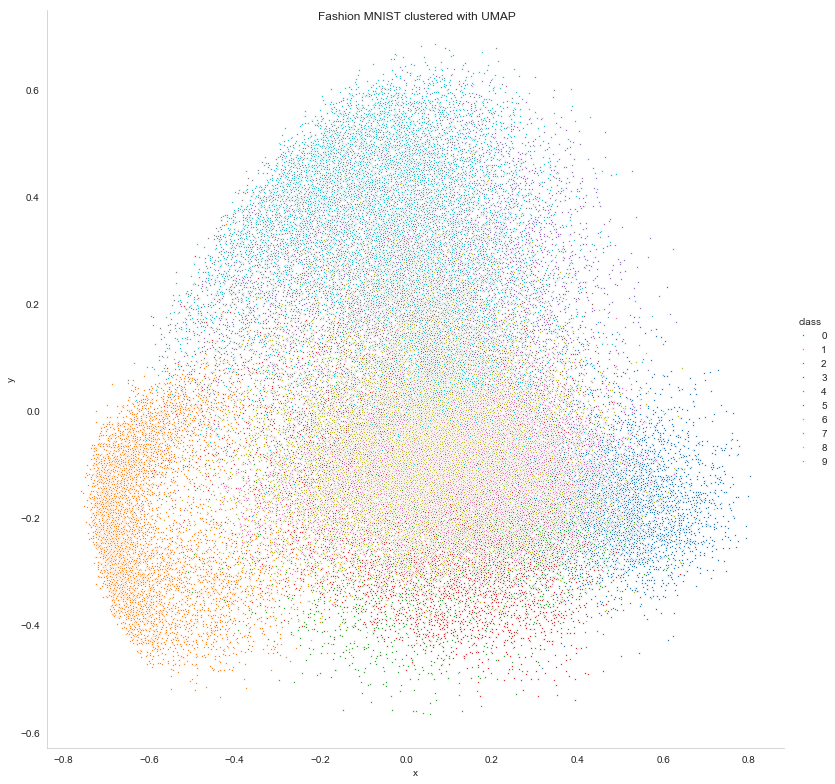

In [13]:
sns.set_style("whitegrid", {'axes.grid' : False})
#adjusting plot dots with plot_kws
ax = sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = reducted, 
             hue = "class",height=11, plot_kws={"s": 4});
ax.fig.suptitle('Fashion MNIST clustered with UMAP') ;